## **Pertemuan 2**

### **Preprocessing - part I**

Pada pertemuan hari ini, kita akan mempelajari langkah-langkah dasar dalam preprocessing teks, yaitu **Case-folding**, **Stopword elimination**, **Tokenization**, dan **Stemming/Lemmatization**. 

Preprocessing data teks adalah proses awal yang penting dalam pengolahan teks yang bertujuan untuk membersihkan data teks dari noise dan menjadikannya lebih siap untuk diolah lebih lanjut. Salah satu alasan mengapa preprocessing data teks sangat penting adalah karena data teks sering kali tidak terstruktur dan mengandung banyak noise. Apalagi jika data teks ditambang dari media sosial. Data teks dapat berisi karakteristik yang berbeda seperti emoji, tanda baca, kata-kata yang tidak baku, dan lain sebagainya. Noise ini dapat menyebabkan kesalahan dalam analisis teks dan mempengaruhi kualitas output akhir.

Untuk keperluan tools yang bisa digunakan untuk melakukan preprocessing pada dataset, pada praktikum hari ini kita akan menggunakan library python `nltk` untuk melakukan preprocessing terhadap dataset teks. Install library `nltk` dengan sintaks dibawah ini:

`pip install nltk`

kemudian setelah itu, import library dengan menggunakan kode dibawah ini:

In [3]:
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Teman-teman dapat terlebih dahulu mengimpor dataset.

In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [19]:
df = pd.read_csv('dataset 2.csv')

df.head(10)

,sentence
0,Saya memakai Honda Jazz GK5 tahun 2014 ( perta...
1,Avanza kenapa jadi boros bensin begini dah ah....
2,"saran ku dan pengalaman ku , mending beli mobi..."
3,Dari segi harga juga pajero lebih mahal 30 jut...
4,Kalo menurut gw enak pajero si
5,CH - R versi negara ini kurang worth it soal f...
6,"@LinaRadj kapan-kapan coba bengkel daihatsu , ..."
7,Mending confero harga nya lebih murah daripada...
8,kalo soal servis mending pilih grand livina so...
9,Lampu utama depan Grand New Veloz juga mendapa...


Sekarang kita akan coba implementasikan NLTK untuk text preprocessing.

#### Case-folding

Case-folding adalah proses konversi seluruh teks menjadi huruf kecil untuk menghilangkan perbedaan antara huruf kapital dan huruf kecil, sehingga teks dapat dianalisis secara konsisten tanpa memperhatikan kapitalisasi.

Kita akan mengambil satu sampel tweet dari kolom 'tweet' pada dataset dan menyimpannya ke dalam variabel 'text'

In [20]:
sentence = df.sample()['sentence'].values[0]

print(sentence)

Secara service untuk konsumen daihatsu masih lebih bagus dibanding toyota.


Implementasinya pada python tidak perlu menggunakan library `NLTK`, cukup menggunakan fungsi `.lower()` ,

In [21]:
# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print(lowercase_sentence)

secara service untuk konsumen daihatsu masih lebih bagus dibanding toyota.


Untuk mengimplementasikan **case folding** pada seluruh baris di kolom tertentu dalam DataFrame, Teman-teman bisa menggunakan metode `.apply()` untuk mengubah teks dalam kolom menjadi huruf kecil.

In [23]:
# Mengubah semua teks dalam kolom 'tweet' menjadi huruf kecil
df['sentence'] = df['sentence'].apply(lambda x: x.lower())

# Menampilkan hasil setelah case folding
df.head(10)

,sentence
0,saya memakai honda jazz gk5 tahun 2014 ( perta...
1,avanza kenapa jadi boros bensin begini dah ah....
2,"saran ku dan pengalaman ku , mending beli mobi..."
3,dari segi harga juga pajero lebih mahal 30 jut...
4,kalo menurut gw enak pajero si
5,ch - r versi negara ini kurang worth it soal f...
6,"@linaradj kapan-kapan coba bengkel daihatsu , ..."
7,mending confero harga nya lebih murah daripada...
8,kalo soal servis mending pilih grand livina so...
9,lampu utama depan grand new veloz juga mendapa...


Penjelasan:
- `apply(lambda x: x.lower())` digunakan untuk menerapkan fungsi `lower()` pada setiap elemen dalam kolom `sentence`, yang mengubah semua huruf menjadi huruf kecil.
- Setelah dijalankan, kolom `sentence` di DataFrame akan berisi teks dalam format huruf kecil.

#### Stopword elimination

**Removing elimination** adalah proses menghapus kata-kata yang tidak memiliki makna penting atau sering muncul dalam teks, seperti "dan", "di", "yang", untuk memfokuskan analisis pada kata-kata yang lebih relevan. 

Untuk menghapus stopwords pada dataset teks, teman-teman dapat menggunakan pustaka `Sastrawi` yang menyediakan fitur untuk menghapus stopwords.

Jika belum menginstal `Sastrawi`, Teman-teman perlu menginstalnya terlebih dahulu:

In [ ]:
!pip install Sastrawi

# Mengimpor pustaka
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Untuk menghapus stopwords dari satu teks, Teman-teman bisa menggunakan kode berikut:

In [ ]:
df.head()

,sentence,tokenized_sentence
0,saya memakai honda jazz gk5 tahun 2014 ( perta...,"[saya, memakai, honda, jazz, gk, tahun, pertam..."
1,avanza kenapa jadi boros bensin begini dah ah....,"[avanza, kenapa, jadi, boros, bensin, begini, ..."
2,"saran ku dan pengalaman ku , mending beli mobi...","[saran, ku, dan, pengalaman, ku, mending, beli..."
3,dari segi harga juga pajero lebih mahal 30 jut...,"[dari, segi, harga, juga, pajero, lebih, mahal..."
4,kalo menurut gw enak pajero si,"[kalo, menurut, gw, enak, pajero, si]"


In [ ]:
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# fungsi untuk menghapus stopwords pada teks
def remove_stopwords(text):
    return stopword_remover.remove(text)

# kita akan mengambil satu sampel baris pada dataframe
sentence = df.head(1)['sentence'].values[0]
# implementasikan fungsi remove_stopwords pada sentence
cleaned_sentence = remove_stopwords(sentence)

print('Original Text: ', sentence)
print('After Stopword Removal: ', cleaned_sentence)

Original Text:  saya memakai honda jazz gk5 tahun 2014 ( pertama meluncur ) . mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai
After Stopword Removal:  memakai honda jazz gk5 tahun 2014 ( pertama meluncur ) . mobil nya bagus enak sesuai moto nya menyenangkan dikendarai


#### Tokenization

Pada tahap ini, text yang telah melewati tahap **Case Folding** akan dilakukan proses pemecahan perkata menggunakan fungsi `.word_tokenize()` pada library NLTK. Selain itu pada tahap ini juga akan dilakukan proses **removing number**, **whitespace** dan **puctuation (tanda baca)**.

- **Removing number**, akan menggunakan fungsi `re.sub(pattern, replace_string, string)` untuk replace angka dengan `“”` ada library `re` (regex) menggunakan pattern `\d+` . Dimana `\d` untuk matching digit (0–9) dan `+` sebagai quantifier untuk menemukan 1 atau lebih matching `\d` . Sehingga penggunaanya akan seperti berikut, `re.sub(r"\d+", "", "H3llo")` yang akan menghasilkan `Hllo` .
- **Removing punctuation**, akan menggunakan fungsi `.translate()` yang akan memetakan teks kedalam character yang sesuai pada mapping table `.maketrans()`. untuk mengganti `string.punctuation` berupa `(!”#$%&\’()*+,-./:;<=>?@[\\]^_``{|}~)\` dengan "" .
- **Removing whitespace**, akan menggunakan fungsi `.strip()` untuk menghapus whitespace leading dan trailing, dan menggunakan fungsi regex substraction `re.sub(pattern, replace_string, string)` dengan pattern `\s+` untuk matching whitespace dengan quantifier matching 1 atau lebih whitespace.

In [26]:
import re
import string 

Kita akan menggunakan variabel `lowercase_sentence` hasil dari case folding diatas

In [ ]:
# remove number
lowercase_sentence = re.sub(r"\d+", "", lowercase_sentence)

# remove punctuation
lowercase_sentence = lowercase_sentence.translate(str.maketrans("","",string.punctuation))

# remove whitespace leading & trailing
lowercase_sentence = lowercase_sentence.strip()

# remove multiple whitespace into single whitespace
lowercase_sentence = re.sub(r'\s+',' ',lowercase_sentence)

tokens = nltk.tokenize.word_tokenize(lowercase_sentence)

print('Before Tokenize : \n') 
print(lowercase_sentence)

print('\n')

print('Tokenizing Result : \n') 
print(tokens)

Before Tokenize : 

secara service untuk konsumen daihatsu masih lebih bagus dibanding toyota


Tokenizing Result : 

['secara', 'service', 'untuk', 'konsumen', 'daihatsu', 'masih', 'lebih', 'bagus', 'dibanding', 'toyota']


Untuk melakukan tokenisasi pada seluruh baris dalam kolom DataFrame, Anda dapat menggunakan fungsi `.apply()` untuk menerapkan tokenisasi pada setiap elemen dalam kolom yang diinginkan.

In [35]:
# Pastikan Anda telah mengunduh punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alghi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
import nltk
import string
import re

# Kemas seluruh kode diatas ke dalam satu function
def preprocess_text(text):
    # Mengubah teks ke huruf kecil
    text = text.lower()

    # remove number
    text = re.sub(r"\d+", "", text)

    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # remove whitespace leading & trailing
    text = text.strip()

    # remove multiple whitespace into single whitespace
    text = re.sub(r'\s+', ' ', text)

    # Tokenisasi
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens


# Menggunakan apply() untuk menerapkan preprocessing pada seluruh kolom 'tweet'
df['tokenized_sentence'] = df['sentence'].apply(preprocess_text)

df.head()

,sentence,tokenized_sentence
0,saya memakai honda jazz gk5 tahun 2014 ( perta...,"[saya, memakai, honda, jazz, gk, tahun, pertam..."
1,avanza kenapa jadi boros bensin begini dah ah....,"[avanza, kenapa, jadi, boros, bensin, begini, ..."
2,"saran ku dan pengalaman ku , mending beli mobi...","[saran, ku, dan, pengalaman, ku, mending, beli..."
3,dari segi harga juga pajero lebih mahal 30 jut...,"[dari, segi, harga, juga, pajero, lebih, mahal..."
4,kalo menurut gw enak pajero si,"[kalo, menurut, gw, enak, pajero, si]"


Penjelasan:
1. Fungsi `preprocess_text` berfungsi untuk melakukan langkah-langkah preprocessing, seperti mengubah teks menjadi huruf kecil, menghapus angka, tanda baca, dan whitespace yang berlebihan, kemudian melakukan tokenisasi.
2. Fungsi ini kemudian diterapkan pada kolom `sentence` menggunakan `apply()` yang akan menghasilkan kolom baru `tokenized_sentence` yang berisi hasil tokenisasi untuk setiap baris.

Untuk menghapus stopwords pada dataset teks, teman-teman dapat menggunakan pustaka `Sastrawi` yang menyediakan fitur untuk menghapus stopwords.

Jika belum menginstal `Sastrawi`, Teman-teman perlu menginstalnya terlebih dahulu:

In [38]:
!pip install Sastrawi

# Mengimpor pustaka
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Untuk menghapus stopwords dari satu teks, Teman-teman bisa menggunakan kode berikut:

In [41]:
df.head()

,sentence,tokenized_sentence
0,saya memakai honda jazz gk5 tahun 2014 ( perta...,"[saya, memakai, honda, jazz, gk, tahun, pertam..."
1,avanza kenapa jadi boros bensin begini dah ah....,"[avanza, kenapa, jadi, boros, bensin, begini, ..."
2,"saran ku dan pengalaman ku , mending beli mobi...","[saran, ku, dan, pengalaman, ku, mending, beli..."
3,dari segi harga juga pajero lebih mahal 30 jut...,"[dari, segi, harga, juga, pajero, lebih, mahal..."
4,kalo menurut gw enak pajero si,"[kalo, menurut, gw, enak, pajero, si]"


In [42]:
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# fungsi untuk menghapus stopwords pada teks
def remove_stopwords(text):
    return stopword_remover.remove(text)

# kita akan mengambil satu sampel baris pada dataframe
sentence = df.head(1)['sentence'].values[0]
# implementasikan fungsi remove_stopwords pada sentence
cleaned_sentence = remove_stopwords(sentence)

print('Original Text: ', sentence)
print('After Stopword Removal: ', cleaned_sentence)

Original Text:  saya memakai honda jazz gk5 tahun 2014 ( pertama meluncur ) . mobil nya bagus dan enak sesuai moto nya menyenangkan untuk dikendarai
After Stopword Removal:  memakai honda jazz gk5 tahun 2014 ( pertama meluncur ) . mobil nya bagus enak sesuai moto nya menyenangkan dikendarai


#### Stemming/Lemmatization

**Stemming** adalah proses mengurangi kata-kata ke bentuk dasarnya dengan menghilangkan imbuhan atau afiks. Tujuannya adalah untuk mengelompokkan berbagai bentuk kata yang memiliki arti yang sama menjadi satu bentuk dasar. Sebagai contoh, kata "berlari" dan "berlari-lari" akan diproses menjadi bentuk dasar "lari". Dalam Bahasa Indonesia, **Sastrawi** adalah pustaka yang populer untuk melakukan stemming.

**Lematisasi**, di sisi lain, adalah proses yang lebih kompleks yang mengubah kata ke bentuk dasar yang lebih bermakna secara linguistik (lemanya), dengan mempertimbangkan konteks. Lematisasi lebih mempertimbangkan aturan tata bahasa dan arti kata daripada hanya menghilangkan imbuhan. Namun, lemmatization tidak selalu didukung dengan baik untuk Bahasa Indonesia, sehingga **stemming** sering digunakan dalam pemrosesan teks Bahasa Indonesia.

In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Mengambil sampel pada 
tokens = df.loc[0, 'tokenized_sentence']

# Melakukan stemming pada setiap token
stemmed_tokens = [stemmer.stem(token) for token in tokens]

print("Before Stemming:", tokens)
print("After Stemming:", stemmed_tokens)


Before Stemming: ['saya', 'memakai', 'honda', 'jazz', 'gk', 'tahun', 'pertama', 'meluncur', 'mobil', 'nya', 'bagus', 'dan', 'enak', 'sesuai', 'moto', 'nya', 'menyenangkan', 'untuk', 'dikendarai']
After Stemming: ['saya', 'pakai', 'honda', 'jazz', 'gk', 'tahun', 'pertama', 'luncur', 'mobil', 'nya', 'bagus', 'dan', 'enak', 'sesuai', 'moto', 'nya', 'senang', 'untuk', 'kendara']


In [48]:
# Fungsi untuk melakukan stemming pada list token
def stemming_on_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Terapkan stemming pada kolom 'tokenized_sentence'
df['stemmed_tokens'] = df['tokenized_sentence'].apply(stemming_on_tokens)

In [49]:
df.head()

,sentence,tokenized_sentence,stemmed_tokens
0,saya memakai honda jazz gk5 tahun 2014 ( perta...,"[saya, memakai, honda, jazz, gk, tahun, pertam...","[saya, pakai, honda, jazz, gk, tahun, pertama,..."
1,avanza kenapa jadi boros bensin begini dah ah....,"[avanza, kenapa, jadi, boros, bensin, begini, ...","[avanza, kenapa, jadi, boros, bensin, begini, ..."
2,"saran ku dan pengalaman ku , mending beli mobi...","[saran, ku, dan, pengalaman, ku, mending, beli...","[saran, ku, dan, alam, ku, mending, beli, mobi..."
3,dari segi harga juga pajero lebih mahal 30 jut...,"[dari, segi, harga, juga, pajero, lebih, mahal...","[dari, segi, harga, juga, pajero, lebih, mahal..."
4,kalo menurut gw enak pajero si,"[kalo, menurut, gw, enak, pajero, si]","[kalo, turut, gw, enak, pajero, si]"


Langkah selanjutnya adalah menghitung frekuensi kata dan membuat plot untuk kata-kata yang paling sering muncul dalam dataset. Untuk menghitung frekuensi kata, Kita bisa menggunakan `Counter` dari pustaka `collections` untuk menghitung kemunculan setiap kata dalam dataset.

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Gabungkan semua token dalam dataset menjadi satu list
all_tokens = [token for tokens in df['tokenized_sentence'] for token in tokens]

# Hitung frekuensi setiap kata
word_freq = Counter(all_tokens)

In [ ]:
# Menampilkan 20 kata yang paling sering muncul
top_20_words = word_freq.most_common(20)

top_20_words

[('nya', 403),
 ('yang', 228),
 ('dan', 226),
 ('saya', 185),
 ('mobil', 174),
 ('di', 138),
 ('lebih', 136),
 ('ini', 131),
 ('banget', 127),
 ('avanza', 107),
 ('irit', 102),
 ('juga', 101),
 ('harga', 97),
 ('honda', 94),
 ('mesin', 90),
 ('untuk', 80),
 ('xenia', 79),
 ('dari', 74),
 ('nyaman', 72),
 ('dengan', 71)]

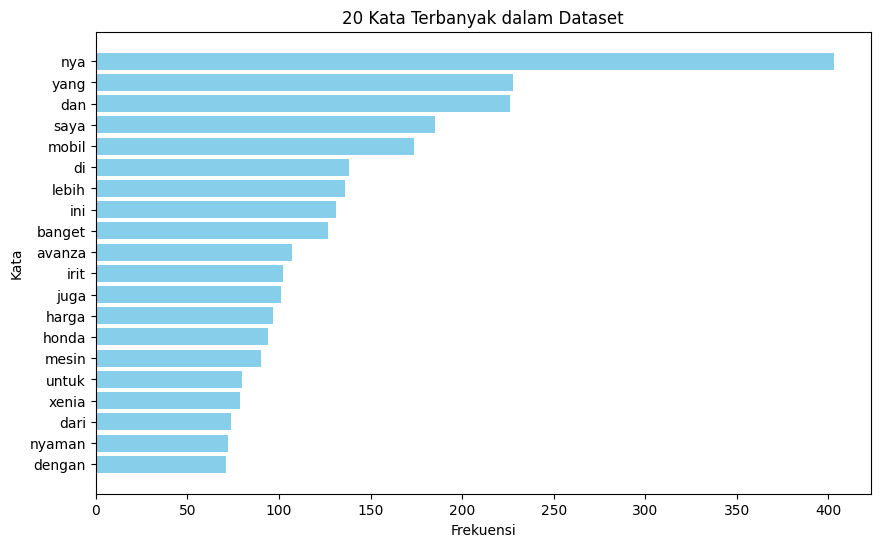

In [53]:
# Pisahkan kata dan frekuensinya untuk plotting
words, freqs = zip(*top_20_words)

# Plotting frekuensi kata
plt.figure(figsize=(10,6))
plt.barh(words, freqs, color='skyblue')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('20 Kata Terbanyak dalam Dataset')
plt.gca().invert_yaxis()  # Membalik urutan plot agar kata teratas muncul di atas
plt.show()